<a href="https://www.kaggle.com/code/ahmed3okka/pg-s4-e8-eda-modeling-submission?scriptVersionId=194555598" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e8/sample_submission.csv
/kaggle/input/playground-series-s4e8/train.csv
/kaggle/input/playground-series-s4e8/test.csv


In [3]:
train_df = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')
submission_df = pd.read_csv('/kaggle/input/playground-series-s4e8/sample_submission.csv')

In [4]:
submission_df['class'].value_counts()

class
e    2077964
Name: count, dtype: int64

In [5]:
train_df.shape , test_df.shape

((3116945, 22), (2077964, 21))

In [6]:
train_df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [7]:
def columns_info(data):
  cols = []
  dtypes = []
  unique_v = []
  n_unique_v = []
  null_count = []
  null_percent = []
      

  for col in data.columns:
    cols.append(col)
    dtypes.append(data[col].dtype)
    unique_v.append(data[col].unique())
    n_unique_v.append(data[col].nunique())
    null_count.append(data[col].isnull().sum())
    null_percent.append(round(data[col].isnull().sum()/data.shape[0],2))
    

  return pd.DataFrame({'cols':cols,'dtypes':dtypes,'unique_v':unique_v,'n_unique_v':n_unique_v,'sum_null':null_count,'%_null':null_percent})

In [8]:
columns_info(train_df)

,cols,dtypes,unique_v,n_unique_v,sum_null,%_null
0,id,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",3116945,0,0.00
1,class,object,"[e, p]",2,0,0.00
2,cap-diameter,float64,"[8.8, 4.51, 6.94, 3.88, 5.85, 4.3, 9.65, 4.55,...",3913,4,0.00
3,cap-shape,object,"[f, x, p, b, o, c, s, d, e, n, nan, w, k, l, 1...",74,40,0.00
4,cap-surface,object,"[s, h, y, l, t, e, g, nan, d, i, w, k, 15.94, ...",83,671023,0.22
5,cap-color,object,"[u, o, b, g, w, n, e, y, r, p, k, l, i, h, d, ...",78,12,0.00
6,does-bruise-or-bleed,object,"[f, t, d, has-ring, w, o, b, x, p, nan, g, y, ...",26,8,0.00
7,gill-attachment,object,"[a, x, s, d, e, nan, f, p, l, m, b, 32.54, n, ...",78,523936,0.17
8,gill-spacing,object,"[c, nan, d, f, x, b, a, 3.61, 2.69, k, 4.8, e,...",48,1258435,0.40
9,gill-color,object,"[w, n, g, k, y, f, p, o, b, u, e, r, d, t, 3.4...",63,57,0.00


Found that some columns have a lot of feature missing so it's better to try drop it for now

In [9]:
columns_info(test_df)

,cols,dtypes,unique_v,n_unique_v,sum_null,%_null
0,id,int64,"[3116945, 3116946, 3116947, 3116948, 3116949, ...",2077964,0,0.00
1,cap-diameter,float64,"[8.64, 6.9, 2.0, 3.47, 6.17, 4.43, 2.92, 2.59,...",3745,7,0.00
2,cap-shape,object,"[x, o, b, f, s, p, c, g, t, i, a, n, 7.21, e, ...",62,31,0.00
3,cap-surface,object,"[nan, t, g, h, d, e, y, k, s, i, l, w, r, f, o...",59,446904,0.22
4,cap-color,object,"[n, o, y, k, b, w, e, g, p, u, l, r, z, f, nan...",57,13,0.00
5,does-bruise-or-bleed,object,"[t, f, c, k, season, does t, nan, x, s, a, p, ...",22,10,0.00
6,gill-attachment,object,"[nan, s, p, x, f, a, d, e, c, t, i, u, 13.42, ...",66,349821,0.17
7,gill-spacing,object,"[nan, c, f, d, s, e, has f, a, y, m, w, b, g, ...",35,839595,0.40
8,gill-color,object,"[w, y, n, e, f, b, g, p, o, u, k, r, l, d, nan...",56,49,0.00
9,stem-height,float64,"[11.13, 1.27, 6.18, 4.98, 6.73, 5.36, 4.83, 2....",2664,1,0.00


In [10]:
col_to_drop = ['id','spore-print-color','veil-color','veil-type','stem-surface','stem-root','gill-spacing','gill-attachment','cap-surface']
train_df.drop(col_to_drop,axis=1,inplace=True)
train_df.dropna(inplace=True)

In [11]:
col_to_drop = ['spore-print-color','veil-color','veil-type','stem-surface','stem-root','gill-spacing','gill-attachment','cap-surface']
test_df.drop(col_to_drop,axis=1,inplace=True)
ID = test_df['id'].copy()
test_df.drop('id',axis=1,inplace=True)

In [12]:
for col in test_df.columns:
    test_df[col].fillna(value=test_df[col].mode()[0],inplace=True)

In [13]:
test_df.isnull().sum()

cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [14]:
train_df.shape , test_df.shape

((2987867, 13), (2077964, 12))

In [15]:
columns_info(train_df)

,cols,dtypes,unique_v,n_unique_v,sum_null,%_null
0,class,object,"[e, p]",2,0,0.0
1,cap-diameter,float64,"[8.8, 4.51, 6.94, 3.88, 5.85, 4.3, 9.65, 4.55,...",3913,0,0.0
2,cap-shape,object,"[f, x, p, b, o, c, s, d, e, n, w, k, l, 19.29,...",72,0,0.0
3,cap-color,object,"[u, o, b, g, w, n, e, y, r, p, k, l, i, h, d, ...",77,0,0.0
4,does-bruise-or-bleed,object,"[f, t, d, has-ring, w, o, b, x, p, g, y, r, a,...",26,0,0.0
5,gill-color,object,"[w, n, g, k, y, f, p, o, b, u, e, r, d, t, 3.4...",62,0,0.0
6,stem-height,float64,"[4.51, 4.79, 6.85, 4.16, 3.37, 5.91, 19.07, 8....",2749,0,0.0
7,stem-width,float64,"[15.39, 6.48, 9.93, 6.53, 8.36, 8.2, 12.69, 9....",5835,0,0.0
8,stem-color,object,"[w, o, n, y, e, u, p, f, g, r, k, l, b, 3.13, ...",59,0,0.0
9,has-ring,object,"[f, t, h, r, y, c, e, g, l, s, p, x, z, f has-...",22,0,0.0


In [16]:
catigorical_col = train_df.select_dtypes(include='object')
nummerical_col = train_df.select_dtypes(exclude='object')

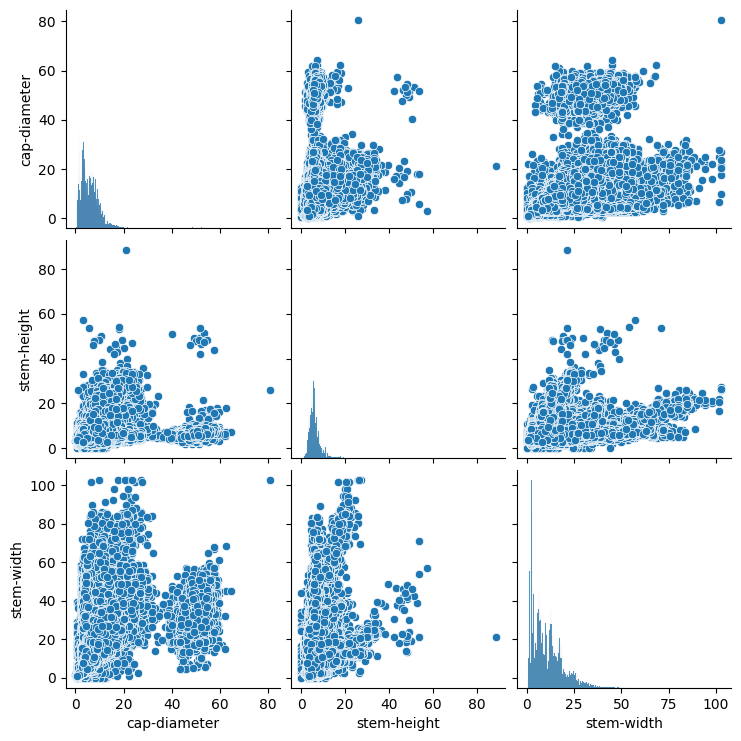

In [17]:
sns.pairplot(nummerical_col)

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in catigorical_col:
    train_df[col]=label_encoder.fit_transform(train_df[col])

In [19]:
features = train_df.drop('class',axis=1)
target = train_df['class']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [21]:
x_train , x_test , y_train , y_test = train_test_split(features,target,test_size=0.2,random_state=42,shuffle=True,stratify=target)

In [22]:
print("x_train shape = ", x_train.shape)
print("y_train shape = ", y_train.shape)
print("x_test shape = ", x_test.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (2390293, 12)
y_train shape =  (2390293,)
x_test shape =  (597574, 12)
y_test shape =  (597574,)


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(x_train_scaled , y_train)
rf_pred=rf_model.predict(x_test_scaled)

In [25]:
print(classification_report(y_test , rf_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    266702
           1       0.99      0.98      0.98    330872

    accuracy                           0.98    597574
   macro avg       0.98      0.98      0.98    597574
weighted avg       0.98      0.98      0.98    597574



In [26]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, rf_pred)

print(f"Matthews Correlation Coefficient (MCC) on Test Set: {mcc:.4f}")

Matthews Correlation Coefficient (MCC) on Test Set: 0.9648


In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in test_df.select_dtypes(include='object'):
    test_df[col]=label_encoder.fit_transform(test_df[col])

In [28]:
test_df_scaled = scaler.transform(test_df)

In [29]:
test_df_pred = rf_model.predict(test_df_scaled)

In [30]:
submission = pd.DataFrame({'id': ID, 'class': test_df_pred})
submission.head()

,id,class
0,3116945,1
1,3116946,0
2,3116947,1
3,3116948,1
4,3116949,1


In [31]:
submission.to_csv('submission.csv', index=False)